### MAP and nDCG 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
labels = ["none", "paiceHusk", "krovetz", "sStripping", "porter2", "lovins"]
map = [0.222357, 0.273885, 0.270678, 0.245353, 0.266312, 0.249784]
nDCG = [0.442813, 0.537582, 0.501087, 0.494990, 0.523511, 0.464134]

data = {"Stemmer": labels, "MAP": map, "nDCG": nDCG}
df = pd.DataFrame(data=data)
df = df.melt(id_vars="Stemmer").rename({"variable": "Measure", "value": "Score"}, axis="columns")

In [3]:
print(df)

       Stemmer Measure     Score
0         none     MAP  0.222357
1    paiceHusk     MAP  0.273885
2      krovetz     MAP  0.270678
3   sStripping     MAP  0.245353
4      porter2     MAP  0.266312
5       lovins     MAP  0.249784
6         none    nDCG  0.442813
7    paiceHusk    nDCG  0.537582
8      krovetz    nDCG  0.501087
9   sStripping    nDCG  0.494990
10     porter2    nDCG  0.523511
11      lovins    nDCG  0.464134


Text(0.5, 1.0, 'MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection')

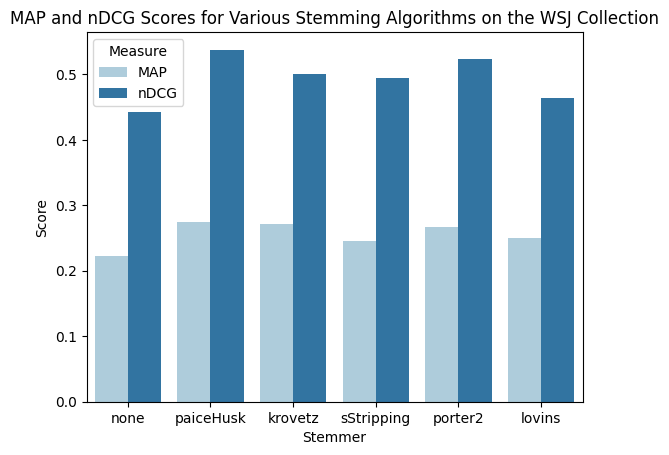

In [4]:
sns.barplot(x="Stemmer", y="Score", hue="Measure", data=df, palette=sns.color_palette("Paired"))
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")

Text(0.5, 1.0, 'MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection')

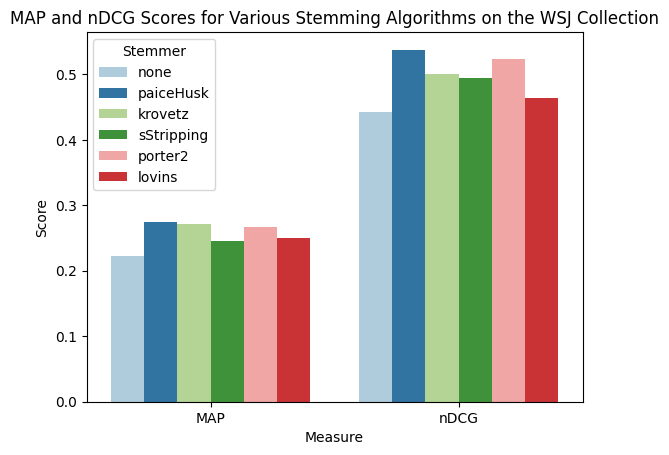

In [5]:
sns.barplot(x="Measure", y="Score", hue="Stemmer", data=df, palette=sns.color_palette("Paired"))
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")